## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ast

%matplotlib inline

!pip install category_encoders
from category_encoders.binary import BinaryEncoder
#Установка catboost
!pip install catboost
from catboost import CatBoostRegressor, CatBoostClassifier, Pool

In [2]:
df = pd.read_csv("../input/amamam/train_dataset_train.csv")
df_test = pd.read_csv("../input/amamam/test_dataset_test.csv") #, nrows = 100000

#Первая идея - длительность проезда до конкретных станций
#Вторая идея - 

In [3]:
#Для каждой станции считаем среднюю длину ее оптимальных путей. Маленькие длины будут у центральных станций.

subway = pd.read_csv("../input/subway/subway.csv")
subway = subway[subway.optimal_route_delta == 0]
subway['final_station'] = subway.all_stations_nm.apply(lambda x: ast.literal_eval(x)[-1])
subway2 = subway.groupby('start_station_nm',as_index = False).agg({'route_dur': 'mean'})

subway2


,start_station_nm,route_dur
0,Авиамоторная,34.503543
1,Автозаводская,31.383381
2,Академическая,31.856038
3,Александровский сад,26.863584
4,Алексеевская,30.590000
...,...,...
287,Электрозаводская,34.101190
288,Юго-Восточная,46.934294
289,Юго-Западная,37.577775
290,Южная,39.332775


In [4]:
subway2['Pushkinskaya'] = subway2.start_station_nm.apply(lambda x: subway[(subway.start_station_nm == x) & (subway.final_station == 'Пушкинская')].route_dur.min())
subway2['Bratislavskaya'] = subway2.start_station_nm.apply(lambda x: subway[(subway.start_station_nm == x) & (subway.final_station == 'Братиславская')].route_dur.min())
subway2['Lobnya'] = subway2.start_station_nm.apply(lambda x: subway[(subway.start_station_nm == x) & (subway.final_station == 'Лобня')].route_dur.min())
# subway2['Shelkovo'] = subway2.start_station_nm.apply(lambda x: subway[(subway.start_station_nm == x) & (subway.final_station == 'Щёлковская')].route_dur.min())
# subway2['Planernaya'] = subway2.start_station_nm.apply(lambda x: subway[(subway.start_station_nm == x) & (subway.final_station == 'Планерная')].route_dur.min())

subway2

,start_station_nm,route_dur,Pushkinskaya,Bratislavskaya,Lobnya
0,Авиамоторная,34.503543,16.18,23.75,68.16
1,Автозаводская,31.383381,13.57,27.08,68.15
2,Академическая,31.856038,19.24,38.75,75.52
3,Александровский сад,26.863584,11.47,33.63,63.16
4,Алексеевская,30.590000,15.75,34.18,55.72
...,...,...,...,...,...
287,Электрозаводская,34.101190,17.73,30.10,69.01
288,Юго-Восточная,46.934294,34.95,45.52,87.58
289,Юго-Западная,37.577775,29.95,52.94,83.64
290,Южная,39.332775,29.82,50.04,79.40


In [5]:
subway

,Unnamed: 0,global_route_id,route_id,route_num,start_station_id,start_station_nm,start_line_id,start_line_nm,all_stations_id,all_stations_nm,station_cnt,transit_cnt,sector_cnt,alternative_route_cnt,route_dur,optimal_route_delta,final_station
1,1,7018_10001,10001_7018,1,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",23,1,2,30,56.01,0.0,Сходненская
30,30,10002_10013,10002_10013,1,10002,Братиславская,10,Люблинско-Дмитровская,"[10002,10013]","[""Братиславская"",""Марьино""]",2,0,1,1,1.75,0.0,Марьино
35,35,2024_10002,10002_2024,1,10002,Братиславская,10,Люблинско-Дмитровская,"[10002,10011,10005,10016,10009,10007,10010,701...","[""Братиславская"",""Люблино"",""Волжская"",""Печатни...",22,2,3,74,53.28,0.0,Беломорская
107,107,10003_1001018,10003_1001018,1,10003,Бутырская,10,Люблинско-Дмитровская,"[10003,10012,10006,10020,9022,9024,9004,3001,3...","[""Бутырская"",""Марьина Роща"",""Достоевская"",""Тру...",14,3,4,19,37.68,0.0,Кунцевская
124,124,10003_11021,10003_11021,1,10003,Бутырская,10,Люблинско-Дмитровская,"[10003,10021,10015,9013,9019,9007,9016,11006,1...","[""Бутырская"",""Фонвизинская"",""Петровско-Разумов...",14,2,3,13,32.59,0.0,Терехово
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991361,2991361,9018_1002007,9018_1002007,1,9018,Серпуховская,9,Серпуховско-Тимирязевская,"[9018,9014,9004,9024,7015,7001,7022,7002,7013,...","[""Серпуховская"",""Полянка"",""Боровицкая"",""Чеховс...",16,2,3,98,43.41,0.0,Волоколамская
2991460,2991460,9018_14016,9018_14016,1,9018,Серпуховская,9,Серпуховско-Тимирязевская,"[9018,5002,5008,6014,6023,6010,14024,14019,14016]","[""Серпуховская"",""Добрынинская"",""Октябрьская"",""...",9,3,3,41,25.35,0.0,Кутузовская
2991490,2991490,9020_10017,9020_10017,1,9020,Тульская,9,Серпуховско-Тимирязевская,"[9020,9018,5002,5009,5012,8002,8006,10017]","[""Тульская"",""Серпуховская"",""Добрынинская"",""Пав...",8,3,3,32,18.96,0.0,Римская
2991523,2991523,8006_9021,9021_8006,1,9021,Улица Академика Янгеля,9,Серпуховско-Тимирязевская,"[9021,9015,9025,9023,9017,9011,9010,9009,9020,...","[""Улица Академика Янгеля"",""Пражская"",""Южная"",""...",15,2,3,16,35.71,0.0,Площадь Ильича


## Рассмотрим датасет по ближе

In [6]:
df = pd.concat([df,df_test])

df["ticket_type_nm"] = pd.Categorical(df["ticket_type_nm"])
bn4 = BinaryEncoder()
df = pd.concat([df, bn4.fit_transform(df.ticket_type_nm)], axis = 1)
df.ticket_type_nm = df.ticket_type_nm.cat.codes
# df.ticket_type_nm = df.ticket_type_nm.astype('int')

df["line_id"] = pd.Categorical(df["line_id"])
df["line_id"].astype('category').cat.codes
bn = BinaryEncoder()
df = pd.concat([df, bn.fit_transform(df.line_id)], axis = 1)
df.line_id = df.line_id.cat.codes
# df.line_id = df.line_id.astype('int')

df["station_id"] = pd.Categorical(df["station_id"])
df["station_id"].astype('category').cat.codes
bn2 = BinaryEncoder()
df = pd.concat([df, bn2.fit_transform(df.station_id)], axis = 1)
df.station_id = df.station_id.cat.codes
# df.station_id = df.station_id.astype('int')

df["entrance_id"] = pd.Categorical(df["entrance_id"])
df["entrance_id"].astype('category').cat.codes
bn3 = BinaryEncoder()
df = pd.concat([df, bn3.fit_transform(df.entrance_id)], axis = 1)
df.entrance_id = df.entrance_id.cat.codes
# df.entrance_id = df.entrance_id.astype('int')

df["day"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
df["hours"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))
df["minutes"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[1]))
df.hours = df.hours + df.minutes*0.016
df = df.drop(["minutes"], axis = 1)


df = df.merge(subway2, how = 'left', right_on = 'start_station_nm', left_on = 'station_nm')
df = df.drop(["entrance_nm", "station_nm", "line_nm", "entrance_id", "station_id", "line_id",'start_station_nm'], axis = 1)

df.label = pd.Categorical(df["label"])

df_test = df[1091021:]
df = df[:1091021]
# df.label = df.label.astype(int)

df

,id,ticket_id,ticket_type_nm,pass_dttm,time_to_under,label,ticket_type_nm_0,ticket_type_nm_1,ticket_type_nm_2,ticket_type_nm_3,...,entrance_id_5,entrance_id_6,entrance_id_7,entrance_id_8,day,hours,route_dur,Pushkinskaya,Bratislavskaya,Lobnya
0,1,40BD89EC85646EFB69E283F39C298E60,40,2022-09-12 05:00:13,216.316667,8001.0,0,0,0,0,...,0,0,0,1,12,5.000,38.700476,27.73,36.25,79.01
1,2,126727A96489CC976A8C08E5CEB00542,54,2022-09-12 05:00:54,648.183333,9011.0,0,0,0,0,...,0,0,1,0,12,5.000,33.374255,17.69,45.62,62.00
2,3,D28CE6A9E0E5B6D213470A97CFF32485,26,2022-09-12 05:00:55,865.333333,7022.0,0,0,0,0,...,0,0,1,0,12,5.000,33.374255,17.69,45.62,62.00
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,3,2022-09-12 05:01:13,1048.233333,2022.0,0,0,0,1,...,0,0,1,0,12,5.016,33.374255,17.69,45.62,62.00
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,38,2022-09-12 05:02:55,965.600000,2017.0,0,0,0,1,...,0,0,1,0,12,5.032,33.374255,17.69,45.62,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,1091017,6A738232F8E43DFCD4027FDC0EA6CC03,40,2022-09-19 02:54:50,124.750000,15005.0,0,0,0,0,...,0,0,1,0,19,2.864,39.803552,29.56,32.08,73.50
1091017,1091018,141174B366F14A8703903813A49374DB,40,2022-09-19 03:06:02,56.066667,6007.0,0,0,0,0,...,1,1,0,1,19,3.096,34.552123,25.45,44.96,81.73
1091018,1091019,E38493B30A7C55170806F187AF5EEA15,40,2022-09-19 03:17:00,91.283333,2010.0,0,0,0,0,...,1,1,1,0,19,3.272,35.832283,21.90,25.18,76.48
1091019,1091020,3DF2B6366631ECA06274DD2CB5B0DF24,40,2022-09-19 03:23:30,47.900000,11014.0,0,0,0,0,...,0,0,0,0,19,3.368,34.154335,27.45,46.96,81.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091021 entries, 0 to 1091020
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   id                1091021 non-null  int64   
 1   ticket_id         1091021 non-null  object  
 2   ticket_type_nm    1091021 non-null  int8    
 3   pass_dttm         1091021 non-null  object  
 4   time_to_under     1091021 non-null  float64 
 5   label             1091021 non-null  category
 6   ticket_type_nm_0  1091021 non-null  int64   
 7   ticket_type_nm_1  1091021 non-null  int64   
 8   ticket_type_nm_2  1091021 non-null  int64   
 9   ticket_type_nm_3  1091021 non-null  int64   
 10  ticket_type_nm_4  1091021 non-null  int64   
 11  ticket_type_nm_5  1091021 non-null  int64   
 12  line_id_0         1091021 non-null  int64   
 13  line_id_1         1091021 non-null  int64   
 14  line_id_2         1091021 non-null  int64   
 15  line_id_3         1091021 non-nu

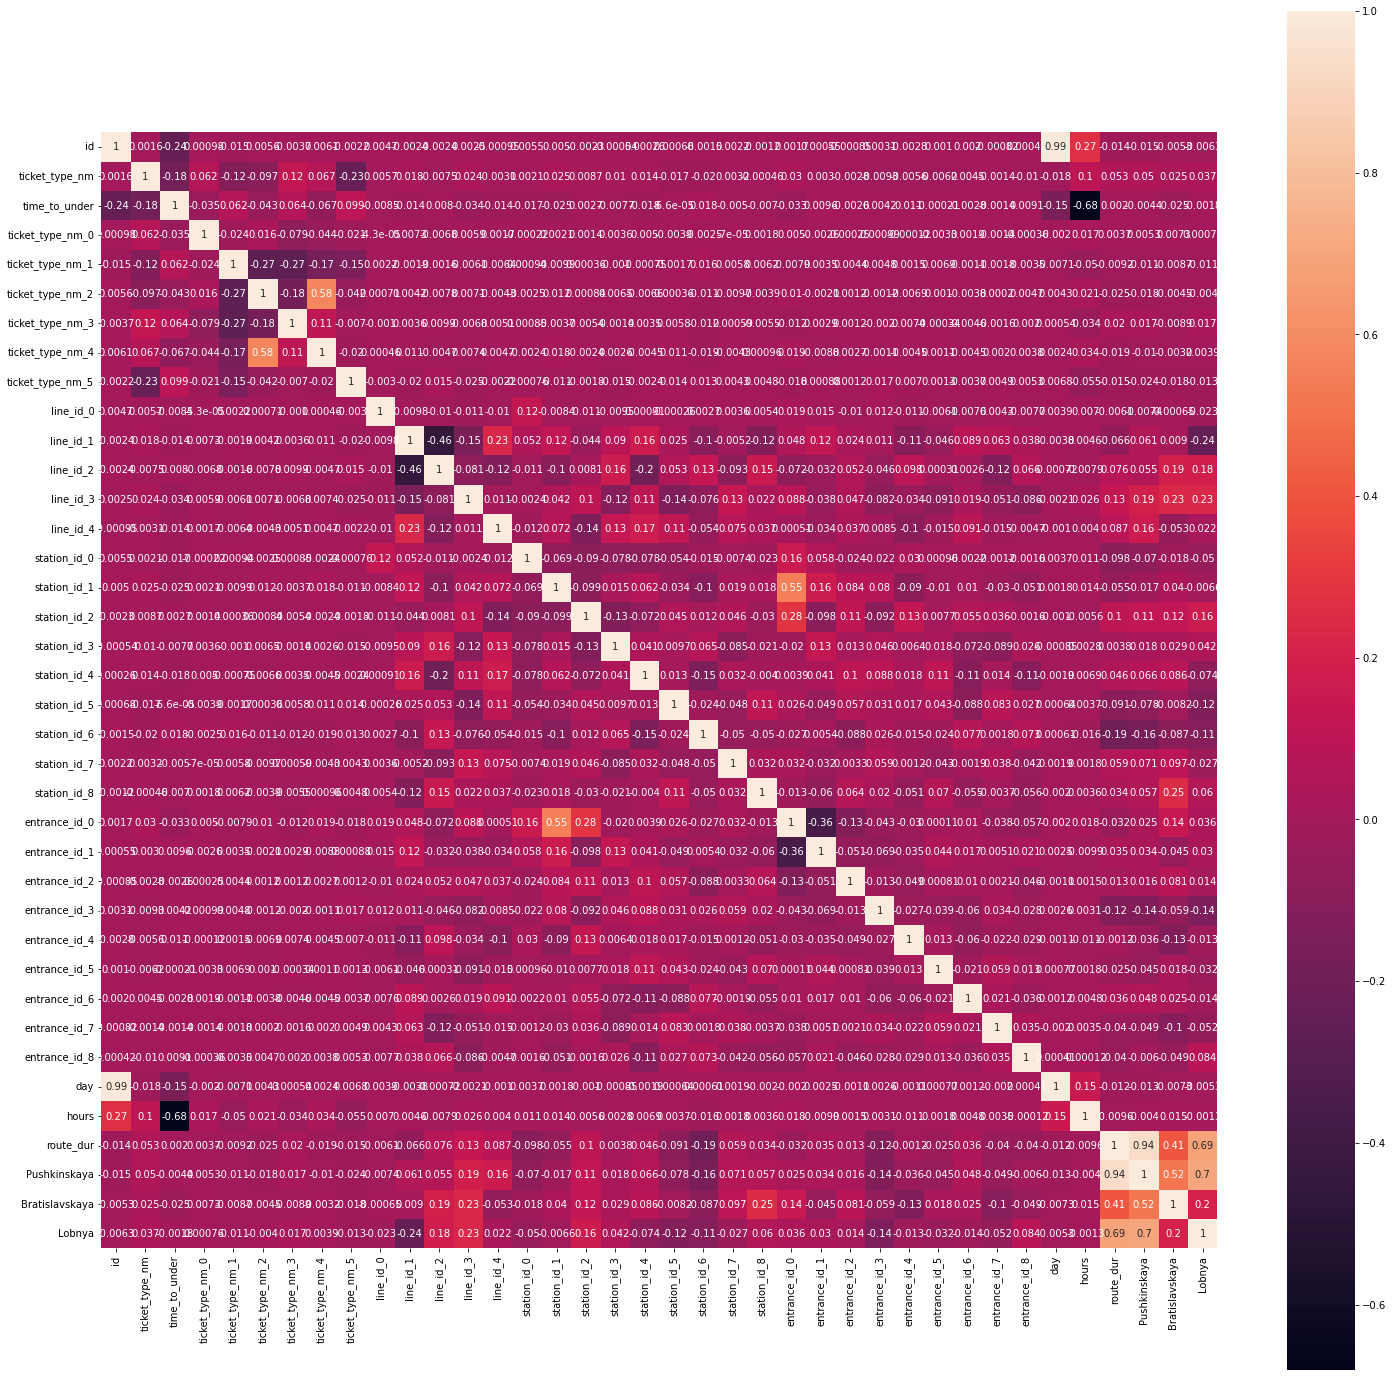

In [8]:
plt.rcParams['figure.figsize']=(25,25)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

In [9]:
df.columns

Index(['id', 'ticket_id', 'ticket_type_nm', 'pass_dttm', 'time_to_under',
       'label', 'ticket_type_nm_0', 'ticket_type_nm_1', 'ticket_type_nm_2',
       'ticket_type_nm_3', 'ticket_type_nm_4', 'ticket_type_nm_5', 'line_id_0',
       'line_id_1', 'line_id_2', 'line_id_3', 'line_id_4', 'station_id_0',
       'station_id_1', 'station_id_2', 'station_id_3', 'station_id_4',
       'station_id_5', 'station_id_6', 'station_id_7', 'station_id_8',
       'entrance_id_0', 'entrance_id_1', 'entrance_id_2', 'entrance_id_3',
       'entrance_id_4', 'entrance_id_5', 'entrance_id_6', 'entrance_id_7',
       'entrance_id_8', 'day', 'hours', 'route_dur', 'Pushkinskaya',
       'Bratislavskaya', 'Lobnya'],
      dtype='object')

## Выделим выборки

In [10]:
X = df.drop(["ticket_id", "pass_dttm", "label","time_to_under",'id'], axis = 1) #,"ticket_type_nm"
y = df[["label"]]

X2 = df.drop(["ticket_id", "pass_dttm", "label","time_to_under",'id','entrance_id_0', 'entrance_id_1', 'entrance_id_2', 'entrance_id_3', 'entrance_id_4', 'entrance_id_5', 'entrance_id_6', 'entrance_id_7', 'entrance_id_8'], axis = 1) #,"ticket_type_nm"
y2 = df[["time_to_under"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.01, random_state=42)

In [12]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036469 entries, 1033762 to 121958
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   label   1036469 non-null  category
dtypes: category(1)
memory usage: 9.9 MB


## Обучение модели

Для станции

In [13]:
# quantized_dataset_path = 'quantized_dataset.bin'

pool_train2 = Pool(X_train, y_train)
# pool_train2.quantize()
# pool_train2.save(quantized_dataset_path)

model2 = CatBoostClassifier(task_type='GPU', iterations = 230, learning_rate=0.03, l2_leaf_reg=0.001, border_count=32, depth = 8) #depth = 4 (500 не хватает, может больше?)
model2.fit(pool_train2,plot=True)
model2.feature_importances_

# Как ускорить модель? Стандартно глубина 6, но если ее уменьшить до 4-5?

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 5.5224025	total: 5.42s	remaining: 20m 40s
1:	learn: 5.4594957	total: 10.3s	remaining: 19m 39s
2:	learn: 5.4084145	total: 16.1s	remaining: 20m 19s
3:	learn: 5.3646718	total: 21.2s	remaining: 19m 55s
4:	learn: 5.3253739	total: 26s	remaining: 19m 29s
5:	learn: 5.2904699	total: 31.1s	remaining: 19m 21s
6:	learn: 5.2589513	total: 36s	remaining: 19m 7s
7:	learn: 5.2293286	total: 41s	remaining: 18m 57s
8:	learn: 5.2020456	total: 45.9s	remaining: 18m 46s
9:	learn: 5.1776160	total: 51.1s	remaining: 18m 43s
10:	learn: 5.1552864	total: 56s	remaining: 18m 34s
11:	learn: 5.1345376	total: 1m	remaining: 18m 23s
12:	learn: 5.1137236	total: 1m 5s	remaining: 18m 19s
13:	learn: 5.0946623	total: 1m 10s	remaining: 18m 10s
14:	learn: 5.0765406	total: 1m 15s	remaining: 18m 7s
15:	learn: 5.0599478	total: 1m 20s	remaining: 18m 1s
16:	learn: 5.0447640	total: 1m 25s	remaining: 17m 57s
17:	learn: 5.0301495	total: 1m 30s	remaining: 17m 48s
18:	learn: 5.0159079	total: 1m 35s	remaining: 17m 43s
19:	learn: 

array([ 9.62522047,  0.32078403,  2.41676708,  2.11110015,  3.26985807,
        2.82099545,  3.03401579,  0.        ,  4.45102429,  5.00123601,
        4.31521313,  4.53309744,  0.15113798,  0.4755465 ,  1.03064292,
        1.06747217,  1.21729123,  1.12393849,  0.91836607,  0.99418075,
        1.21660402,  0.78397013,  0.73621914,  1.70530919,  1.56182226,
        1.17958174,  1.41382664,  1.46524494,  1.74314183,  1.92306993,
        2.89583947, 14.12588054,  5.01760122,  2.25472121,  6.67213488,
        6.42714482])

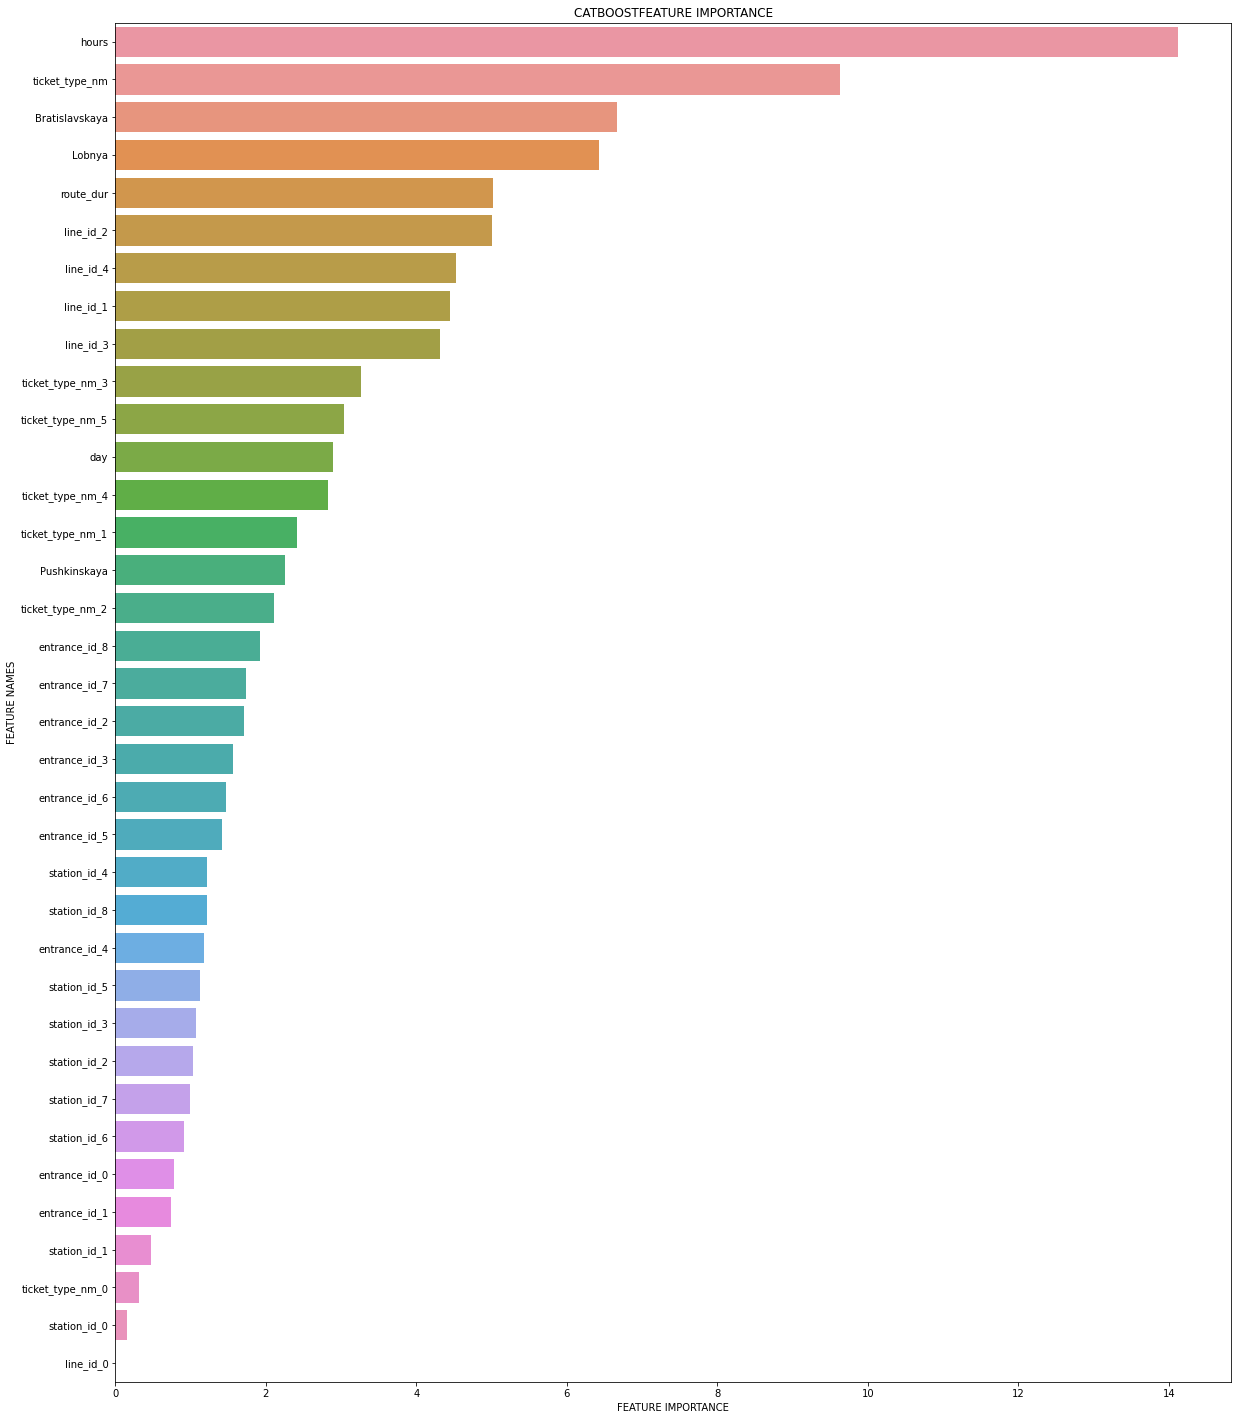

In [14]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(20,25))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(model2.get_feature_importance(),X_train.columns,'CATBOOST')

In [15]:
pool_train = Pool(X_train2, y_train2)
pool_test = Pool(X_test)

# pool_test.quantize()
# pool_test.save(quantized_dataset_path)

pool_test2 = Pool(X_test2)

In [16]:
pred_class = model2.predict(pool_test)

from sklearn.metrics import recall_score, r2_score

print('Part Classifier ', recall_score(y_test["label"], pred_class , average='macro'))


Part Classifier  0.087176029477246


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# from sklearn.model_selection import GridSearchCV

# model3 = CatBoostRegressor(task_type='GPU')
# Grid_CBC = GridSearchCV(estimator=model3, param_grid = params, cv = 2, n_jobs=-1)
# Grid_CBC.fit(X_train, y_train["time_to_under"])

# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
# print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
# print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

NameError: name 'stop' is not defined

In [18]:
model = CatBoostRegressor(task_type = 'GPU', iterations = 4000, l2_leaf_reg = 0.001, border_count = 512) 

model.fit(pool_train,plot=True)
model.feature_importances_


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 229.4151012	total: 63.4ms	remaining: 4m 13s
1:	learn: 226.1381689	total: 103ms	remaining: 3m 26s
2:	learn: 223.0121486	total: 188ms	remaining: 4m 11s
3:	learn: 220.0302791	total: 244ms	remaining: 4m 3s
4:	learn: 217.1807665	total: 302ms	remaining: 4m 1s
5:	learn: 214.4659601	total: 364ms	remaining: 4m 2s
6:	learn: 211.8842279	total: 437ms	remaining: 4m 9s
7:	learn: 209.4186717	total: 497ms	remaining: 4m 7s
8:	learn: 207.0622332	total: 548ms	remaining: 4m 2s
9:	learn: 204.8110319	total: 663ms	remaining: 4m 24s
10:	learn: 202.6630735	total: 726ms	remaining: 4m 23s
11:	learn: 200.6203982	total: 800ms	remaining: 4m 25s
12:	learn: 198.6777309	total: 874ms	remaining: 4m 27s
13:	learn: 196.8191613	total: 913ms	remaining: 4m 20s
14:	learn: 195.0492319	total: 992ms	remaining: 4m 23s
15:	learn: 193.3570507	total: 1.03s	remaining: 4m 16s
16:	learn: 191.7508365	total: 1.1s	remaining: 4m 17s
17:	learn: 190.2229291	total: 1.15s	remaining: 4m 14s
18:	learn: 188.7727087	total: 1.22s	remainin

array([2.01437507e+01, 2.97182557e-01, 1.36789084e+00, 4.73558880e-01,
       1.73785269e+00, 1.38265822e+00, 1.79234045e+00, 7.16521076e-03,
       3.27724327e-01, 3.86203428e-01, 2.13868035e-01, 3.34057589e-01,
       9.71554987e-02, 1.52976913e-01, 1.64769418e-01, 1.73780358e-01,
       1.84670915e-01, 1.82499910e-01, 1.96021758e-01, 1.79078763e-01,
       1.55057542e-01, 4.71311340e+00, 5.89685362e+01, 1.77353724e+00,
       1.43684670e+00, 1.52728213e+00, 1.63042039e+00])

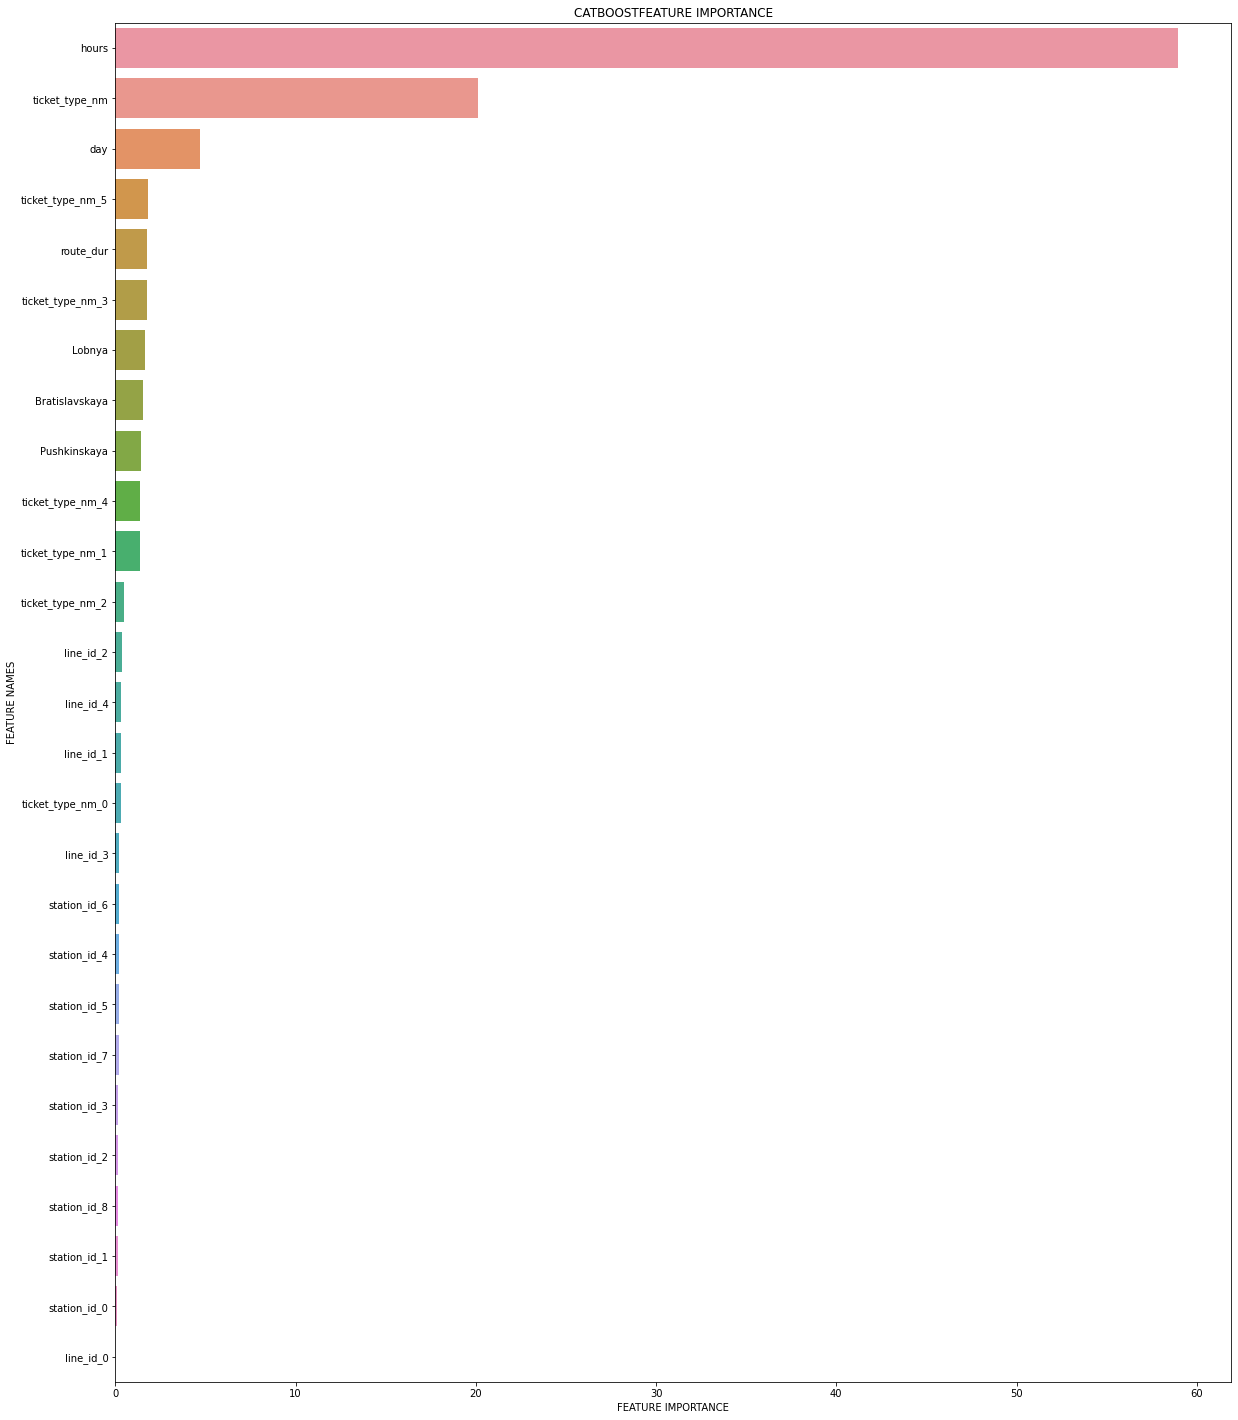

In [19]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(20,25))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(model.get_feature_importance(),X_train2.columns,'CATBOOST')

## Оценка точности

In [21]:
# pred_class = clf.predict(X_test)
# pred_reg = reg.predict(X_test)
pred_reg = model.predict(pool_test2)
pred_class = model2.predict(pool_test)

In [22]:
from sklearn.metrics import recall_score, r2_score

print(df.time_to_under.min())
for i in range(len(pred_reg)):
    if pred_reg[i] < df.time_to_under.min():
        pred_reg[i] = df.time_to_under.min()

score = 0.5 * recall_score(y_test["label"], pred_class , average='macro') +  0.5 * r2_score(y_test2["time_to_under"], pred_reg)
print('Part Classifier ', recall_score(y_test["label"], pred_class , average='macro'))
print('Part Regressor ', r2_score(y_test2["time_to_under"], pred_reg))
score
# 0.31034861374328265                 0.5457644

30.016666666666666
Part Classifier  0.087176029477246
Part Regressor  0.5453716259089718


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3162738276931089

# Работа с тестовой выборкой

In [23]:
df_test2 = df_test.drop(["ticket_id", "pass_dttm", "label", "time_to_under",'id'], axis = 1)

pool_otvet = Pool(df_test2)
time_to_under = model.predict(pool_otvet)
label = model2.predict(pool_otvet)

label

array([[6009.],
       [3016.],
       [6009.],
       ...,
       [1014.],
       [6007.],
       [3020.]])

In [24]:
otvet = df_test[{'id'}]
otvet['time_to_under'] = time_to_under
otvet['label'] = label

otvet

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,time_to_under,label
1091021,1091022,649.957371,6009.0
1091022,1091023,388.303173,3016.0
1091023,1091024,539.182078,6009.0
1091024,1091025,659.071136,2024.0
1091025,1091026,649.957371,6009.0
...,...,...,...
1652906,1652907,154.401082,6011.0
1652907,1652908,29.872481,11020.0
1652908,1652909,-14.942106,1014.0
1652909,1652910,56.758057,6007.0


In [25]:
otvet.to_csv('otvet.csv', index=None)

217589
466781


<AxesSubplot:>

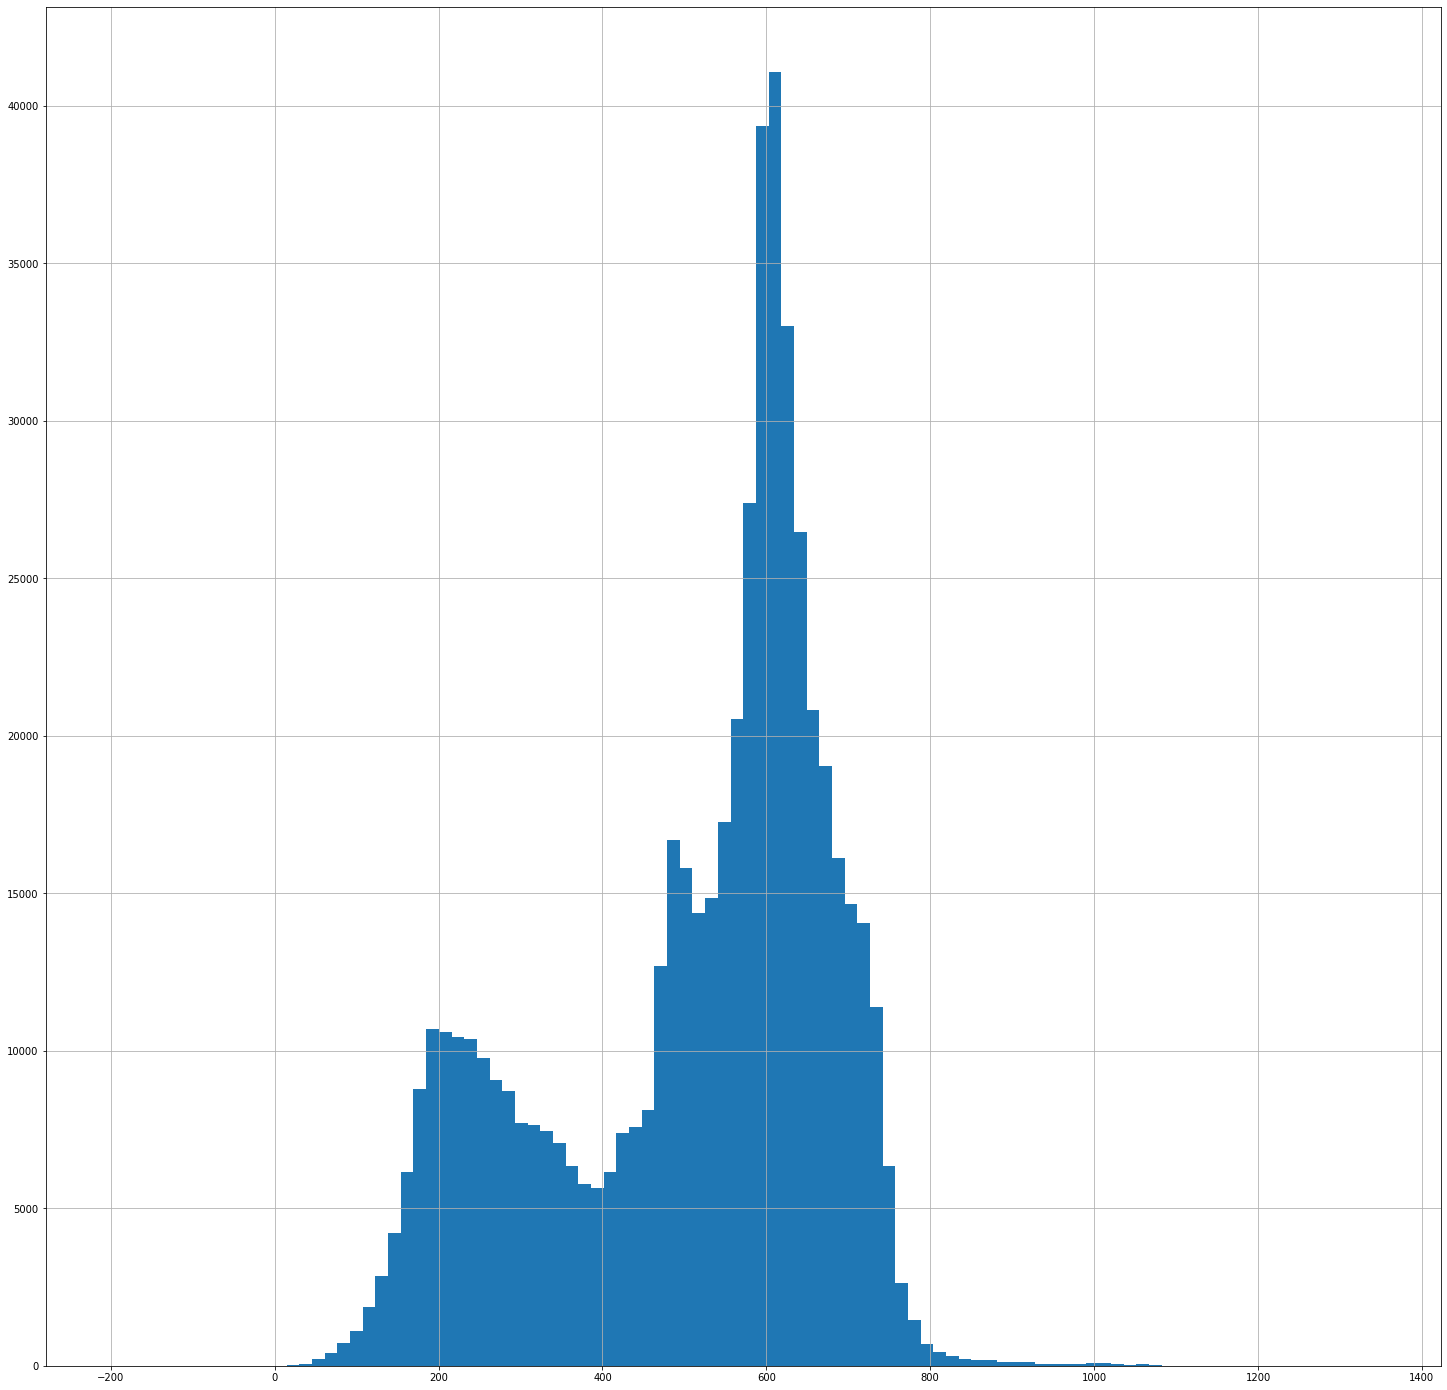

In [26]:
print(otvet.time_to_under[otvet.time_to_under > 600].count())
print(df.time_to_under[df.time_to_under > 600].count())
otvet.time_to_under.hist(bins = 100)